# Assessment

In [2]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import re
import numpy as np

In [3]:
G = nx.read_graphml('london.graph')
G.edges(data=True)

EdgeDataView([('Wembley Park', 'Kingsbury', {'length': 2916.7715580506483, 'line_name': 'Jubilee', 'flows': 12356}), ('Wembley Park', 'Neasden', {'length': 2353.1659381957816, 'line_name': 'Jubilee', 'flows': 6744}), ('Wembley Park', 'Preston Road', {'length': 1419.7351657633037, 'line_name': 'Metropolitan', 'flows': 36601}), ('Wembley Park', 'Finchley Road', {'length': 7266.37392749648, 'line_name': 'Metropolitan', 'flows': 55216}), ('Kingsbury', 'Queensbury', {'length': 1245.9952343630068, 'line_name': 'Jubilee', 'flows': 9419}), ('Queensbury', 'Canons Park', {'length': 1693.307343195774, 'line_name': 'Jubilee', 'flows': 6385}), ('Canons Park', 'Stanmore', {'length': 1419.6694762456716, 'line_name': 'Jubilee', 'flows': 3624}), ('Stratford', 'West Ham', {'length': 1673.509515131191, 'line_name': 'Jubilee', 'flows': 91801}), ('Stratford', 'Mile End', {'length': 2805.0013918567865, 'line_name': 'Central', 'flows': 12010}), ('Stratford', 'Leyton', {'length': 2131.342925924046, 'line_name

{'Metropolitan', 'Central', 'Bakerloo', 'TfL Rail', 'Northern', 'Circle', 'Waterloo & City', 'Piccadilly', 'Victoria', 'Jubilee', 'Hammersmith & City', 'London Overground', 'District', 'DLR'}


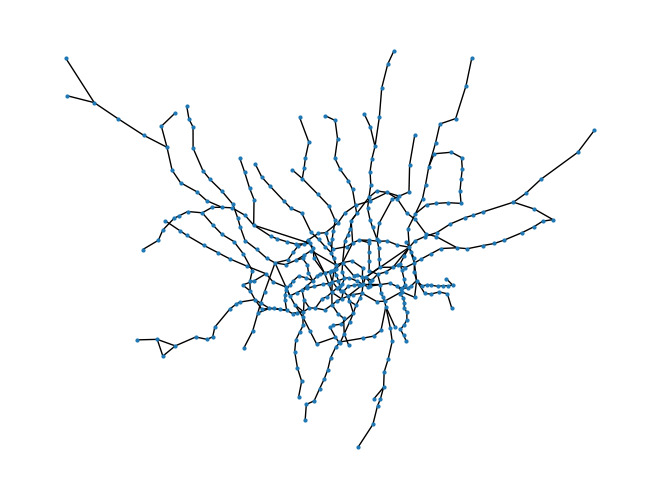

In [4]:
# Change the data type of coordinates into 
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

# Plot the raw network
pos = nx.get_node_attributes(G, 'coords')
Gcc = nx.connected_components(G)
for n in Gcc:
    G_sub = G.subgraph(n)
    lines = [data['line_name'] for u,v, data in G_sub.edges(data=True)]
    print(set(lines))
    nx.draw(G_sub, pos, node_size=4)
    plt.show()


# Centrality measures

## 1. Closeness Centrality

In [5]:
closeness_t = nx.closeness_centrality(G)
df_closeness_t = pd.DataFrame.from_dict(closeness_t, columns=['closeness_t'], orient='index')
df_closeness_t = df_closeness_t.sort_values(by='closeness_t', ascending=False)

df_closeness_t10 = df_closeness_t.head(10)
print(df_closeness_t10)
# Prepare for node-removal, 20 nodes are taken since dupilication might exist 
df_closeness_t20 = df_closeness_t.head(20)


                          closeness_t
Green Park                   0.114778
Bank and Monument            0.113572
King's Cross St. Pancras     0.113443
Westminster                  0.112549
Waterloo                     0.112265
Oxford Circus                0.111204
Bond Street                  0.110988
Farringdon                   0.110742
Angel                        0.110742
Moorgate                     0.110314


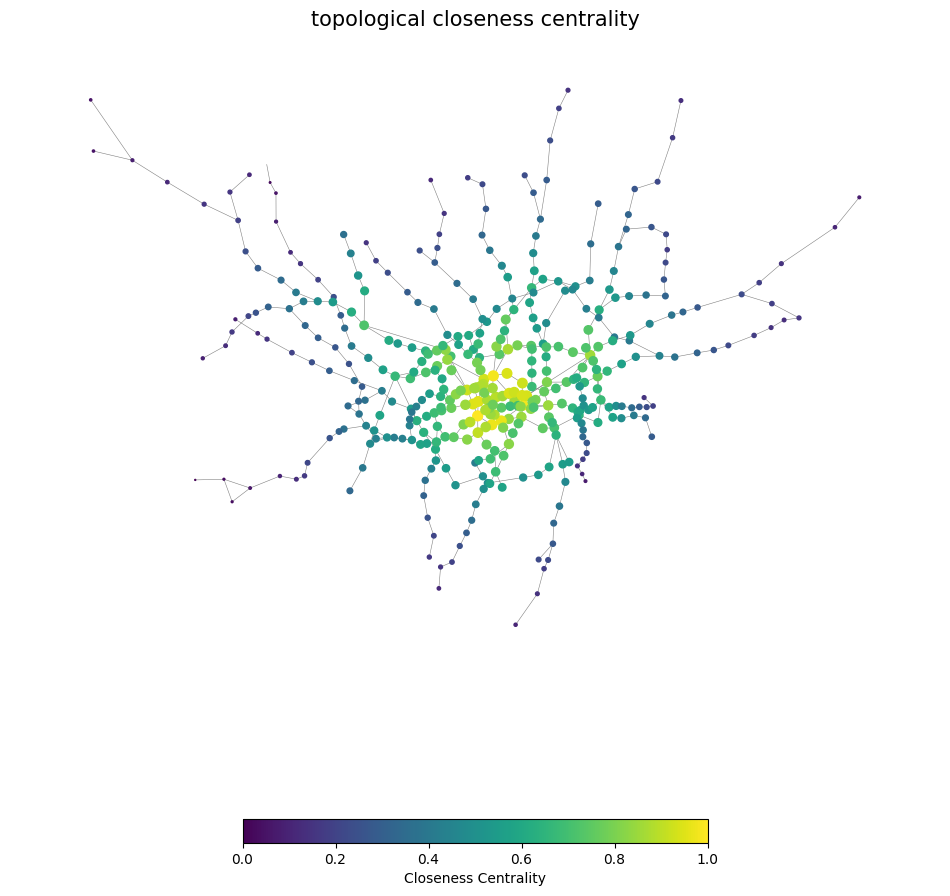

In [6]:
nx.set_node_attributes(G, closeness_t,'closeness_t')

# Lets set color and width of nodes according to the closeness values
clos_t_val=[(i[1]['closeness_t']) for i in G.nodes(data=True)]

closs_t_color=[(i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val)) for i in G.nodes(data=True)]
closs_t_size=[((i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val))*50) for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_t_color,
        node_size= closs_t_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("topological closeness centrality",fontsize=15)
plt.show()

## Betweenness Centrality

In [7]:
betweenness_t = nx.betweenness_centrality(G, normalized=True)
df_betweenness_t = pd.DataFrame.from_dict(betweenness_t, columns=['betweenness_t'], orient='index')
df_betweenness_t = df_betweenness_t.sort_values(by='betweenness_t', ascending=False)

df_betweenness_t10 = df_betweenness_t.head(10)
print(df_betweenness_t10)

df_betweenness_t20 = df_betweenness_t.head(20)

betweenness_l = nx.betweenness_centrality(G, weight='length', normalized=True)
df_betweenness_l = pd.DataFrame.from_dict(betweenness_l, columns=['betweenness_l'], orient='index')
df_betweenness_l = df_betweenness_l.sort_values(by='betweenness_l', ascending=False)

df_betweenness_l10 = df_betweenness_l.head(10)
print(df_betweenness_l10)

df_betweenness_l20 = df_betweenness_l.head(20)

                          betweenness_t
Stratford                      0.297846
Bank and Monument              0.290489
Liverpool Street               0.270807
King's Cross St. Pancras       0.255307
Waterloo                       0.243921
Green Park                     0.215835
Euston                         0.208324
Westminster                    0.203335
Baker Street                   0.191568
Finchley Road                  0.165085
                          betweenness_l
Bank and Monument              0.221253
King's Cross St. Pancras       0.209185
Stratford                      0.182306
Oxford Circus                  0.169937
Euston                         0.165915
Baker Street                   0.152256
Earl's Court                   0.143797
Shadwell                       0.139449
Waterloo                       0.130426
South Kensington               0.129511


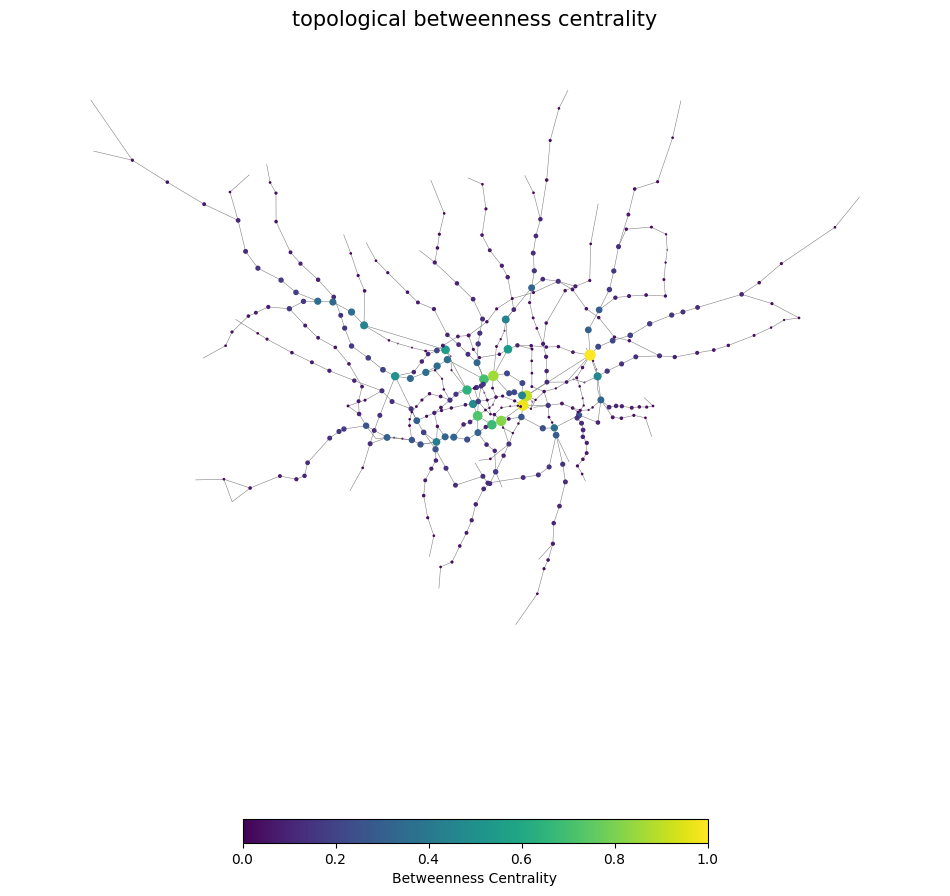

In [8]:
nx.set_node_attributes(G, betweenness_t,'betweenness_t')

# Lets set color and width of nodes according to the closeness values
between_t_val=[(i[1]['betweenness_t']) for i in G.nodes(data=True)]

between_t_color=[(i[1]['betweenness_t']-min(between_t_val))/(max(between_t_val)-min(between_t_val)) for i in G.nodes(data=True)]
between_t_size=[((i[1]['betweenness_t']-min(between_t_val))/(max(between_t_val)-min(between_t_val))*50) for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= between_t_color,
        node_size= between_t_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("topological betweenness centrality",fontsize=15)
plt.show()

## Eigenvector centrality

In [9]:
eigenvector_t = nx.eigenvector_centrality(G, max_iter=1000)
df_eigenvector_t = pd.DataFrame.from_dict(eigenvector_t, columns=['eigenvector_t'], orient='index')
df_eigenvector_t = df_eigenvector_t.sort_values(by='eigenvector_t', ascending=False)

df_eigenvector_t10 = df_eigenvector_t.head(10)
print(df_eigenvector_t10)

df_eigenvector_t20 = df_eigenvector_t.head(20)

                   eigenvector_t
Bank and Monument       0.383427
Liverpool Street        0.328824
Stratford               0.269179
Waterloo                0.249731
Moorgate                0.215137
Green Park              0.197630
Oxford Circus           0.184094
Tower Hill              0.171676
Westminster             0.168610
Shadwell                0.159090


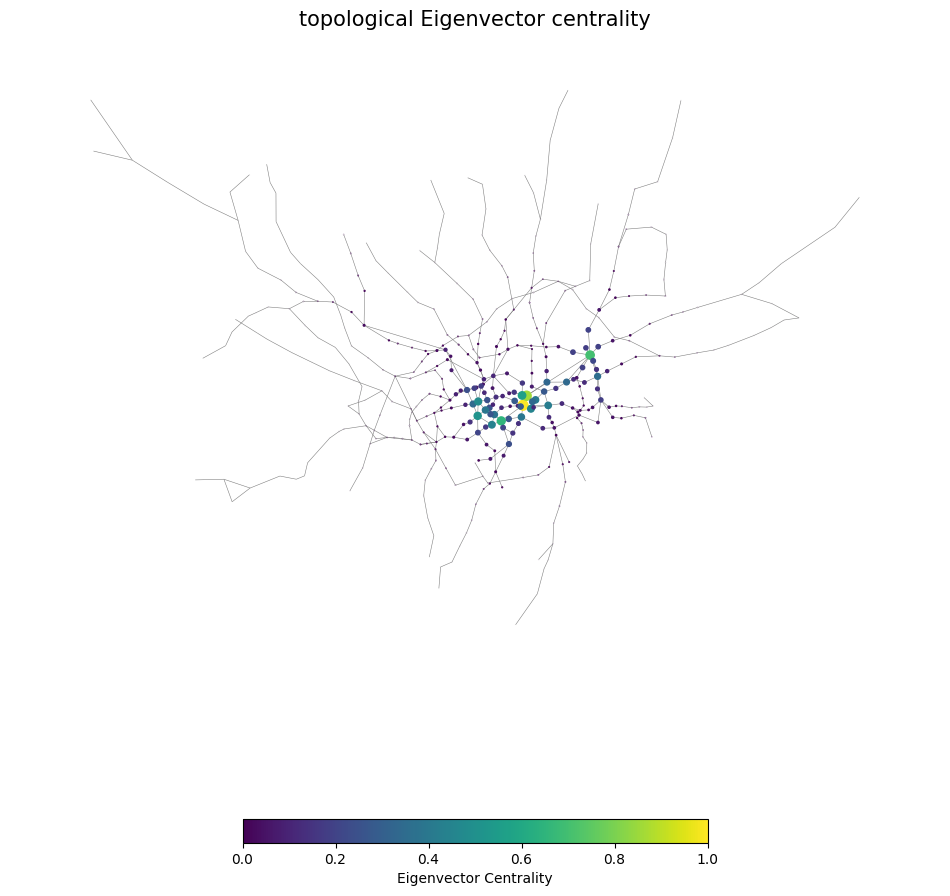

In [10]:
nx.set_node_attributes(G, eigenvector_t,'eigenvector_t')

# Lets set color and width of nodes according to the closeness values
eigen_t_val=[(i[1]['eigenvector_t']) for i in G.nodes(data=True)]

eigen_t_color=[(i[1]['eigenvector_t']-min(eigen_t_val))/(max(eigen_t_val)-min(eigen_t_val)) for i in G.nodes(data=True)]
eigen_t_size=[((i[1]['eigenvector_t']-min(eigen_t_val))/(max(eigen_t_val)-min(eigen_t_val))*50) for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= eigen_t_color,
        node_size= eigen_t_size)

plt.colorbar(nod,label="Eigenvector Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("topological Eigenvector centrality",fontsize=15)
plt.show()

# Impact Measures

In [11]:
# Measure1 Global Efficiency
global_efficiency = nx.global_efficiency(G)
print('Global efficiency is: ', global_efficiency)
# Measure2 average shortest path length
path_length = nx.average_shortest_path_length(G)
print('Average shortest path length is: ', path_length)

Global efficiency is:  0.1012561935972123
Average shortest path length is:  13.545997506234414


# Node removal

In [12]:
def impact_measure(graph):
    
    current_global_efficiency = nx.global_efficiency(graph)

    if nx.is_connected(graph) == False:
        connected = list(nx.connected_components(graph))
        sum_path_length=[]
        for i in connected:
            sub = graph.subgraph(i)
            current_path_length = nx.average_shortest_path_length(sub)
            sum_path_length.append(current_path_length)
            current_path_length = sum(sum_path_length)/len(sum_path_length)
    else:
        current_path_length = nx.average_shortest_path_length(graph)
    
    
    return current_global_efficiency, current_path_length

## Closeness Centrality Removal

In [13]:
# A: non-sequential removal
G_C_A = G.copy()

columns = ['centrality measure', 'strategy', 'removed node number', 'removed station', 'global efficiency', 'average shortest path length']
df_closeness_A = pd.DataFrame(columns=columns)

g0, a0 = impact_measure(G_C_A)
df_closeness_A.loc[0] = ['closeness', 'A: non-sequential', 0, 'initial', g0, a0]
for i in range(20):
    G_C_A.remove_node(df_closeness_t20.index[i])
    current_g, current_a = impact_measure(G_C_A)
    df_closeness_A.loc[i+1] = ['closeness', 'A: non-sequential', i+1, df_closeness_t20.index[i], current_g, current_a]

df_closeness_A.head(11)


,centrality measure,strategy,removed node number,removed station,global efficiency,average shortest path length
0,closeness,A: non-sequential,0,initial,0.101256,13.545998
1,closeness,A: non-sequential,1,Green Park,0.099190,13.824536
2,closeness,A: non-sequential,2,Bank and Monument,0.094872,14.382728
3,closeness,A: non-sequential,3,King's Cross St. Pancras,0.087934,15.983773
4,closeness,A: non-sequential,4,Westminster,0.087372,16.080248
5,closeness,A: non-sequential,5,Waterloo,0.084859,16.855722
6,closeness,A: non-sequential,6,Oxford Circus,0.082781,17.431832
7,closeness,A: non-sequential,7,Bond Street,0.082581,17.464267
8,closeness,A: non-sequential,8,Farringdon,0.082600,17.462494
9,closeness,A: non-sequential,9,Angel,0.082622,17.460528


In [14]:
# B: sequential removal
G_C_B = G.copy()
#print('GCB: ', G_C_B.nodes(data=True))
df_closeness_B = pd.DataFrame(columns=columns)
df_closeness_B.loc[0] = ['closeness', 'B: sequential', 0, 'initial', g0, a0]

for i in range(20):
    current_c = nx.closeness_centrality(G_C_B)
    nx.set_node_attributes(G_C_B, current_c, 'closeness_t')

    df = pd.DataFrame(index=G_C_B.nodes())
    df['closeness_t'] = pd.Series(nx.get_node_attributes(G_C_B, 'closeness_t'))
    df_sorted = df.sort_values(['closeness_t'], ascending= False)
    
    removed_node = df_sorted.head(1)
    removed_station = removed_node.index[0]
    G_C_B.remove_node(removed_station)
    current_g, current_a = impact_measure(G_C_B)

    new_node1 = pd.DataFrame([['closeness', 'B: sequential', i+1, removed_station, current_g, current_a]], columns=columns)
    df_closeness_B = pd.concat([df_closeness_B,new_node1], ignore_index=True)

df_closeness_B.head(11)

,centrality measure,strategy,removed node number,removed station,global efficiency,average shortest path length
0,closeness,B: sequential,0,initial,0.101256,13.545998
1,closeness,B: sequential,1,Green Park,0.099190,13.824536
2,closeness,B: sequential,2,King's Cross St. Pancras,0.094435,14.658480
3,closeness,B: sequential,3,Waterloo,0.091816,15.114818
4,closeness,B: sequential,4,Bank and Monument,0.085426,16.702427
5,closeness,B: sequential,5,West Hampstead,0.080544,18.974696
6,closeness,B: sequential,6,Canada Water,0.058101,12.475482
7,closeness,B: sequential,7,Stratford,0.051884,7.941636
8,closeness,B: sequential,8,Earl's Court,0.050350,8.129563
9,closeness,B: sequential,9,Shepherd's Bush,0.044395,8.222498


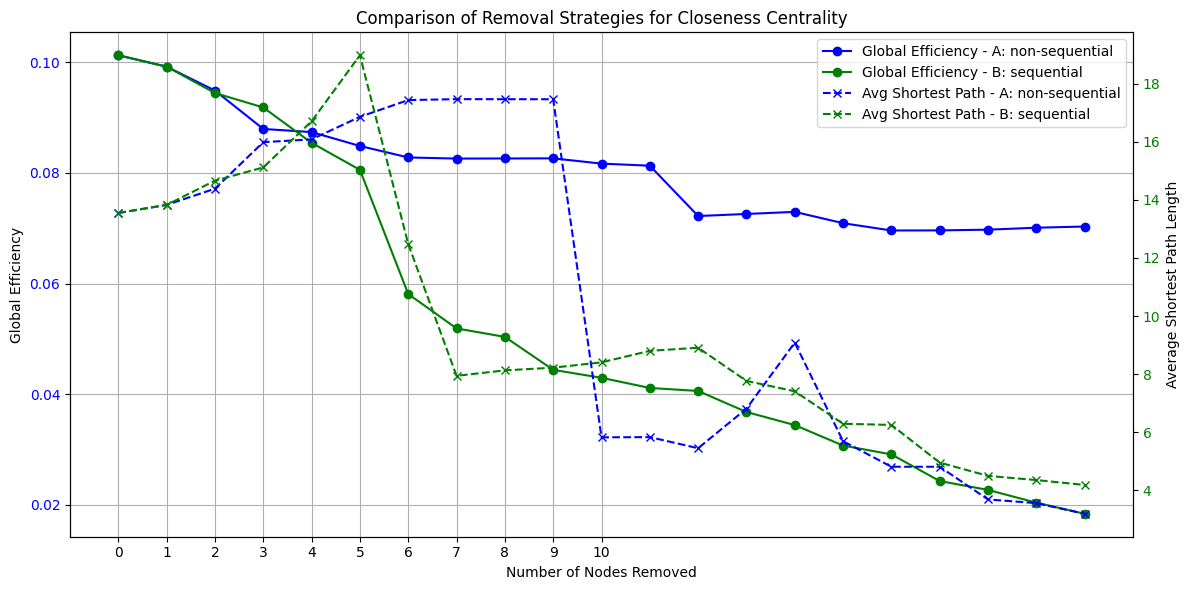

In [15]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Global Efficiency on the primary y-axis
line1, = ax1.plot(df_closeness_A['removed node number'], df_closeness_A['global efficiency'], label='Global Efficiency - A: non-sequential', color='blue', marker='o')
line2, = ax1.plot(df_closeness_B['removed node number'], df_closeness_B['global efficiency'], label='Global Efficiency - B: sequential', color='green', marker='o')
ax1.set_xlabel('Number of Nodes Removed')
ax1.set_ylabel('Global Efficiency')
ax1.tick_params(axis='y', labelcolor='blue')

# Secondary y-axis for Average Shortest Path Length
ax2 = ax1.twinx()
line3, = ax2.plot(df_closeness_A['removed node number'], df_closeness_A['average shortest path length'], label='Avg Shortest Path - A: non-sequential', color='blue', linestyle='--', marker='x')
line4, = ax2.plot(df_closeness_B['removed node number'], df_closeness_B['average shortest path length'], label='Avg Shortest Path - B: sequential', color='green', linestyle='--', marker='x')
ax2.set_ylabel('Average Shortest Path Length')
ax2.tick_params(axis='y', labelcolor='green')

# Combine legends from both y-axes
lines = [line1, line2, line3, line4]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='best')

# Set x-axis ticks to units of 1
ax1.set_xticks(np.arange(0, 11, 1))

# Title and grid
plt.title('Comparison of Removal Strategies for Closeness Centrality')
ax1.grid(True)
ax2.grid(False)

fig.tight_layout()
plt.show()

## Betweenness Centrality Removal

In [16]:
# A: non-sequential removal
G_B_A = G.copy()

columns = ['centrality measure', 'strategy', 'removed node number', 'removed station', 'global efficiency', 'average shortest path length']
df_betweenness_A = pd.DataFrame(columns=columns)

g0, a0 = impact_measure(G_B_A)
df_betweenness_A.loc[0] = ['betweenness', 'A: non-sequential', 0, 'initial', g0, a0]
for i in range(20):
    G_B_A.remove_node(df_betweenness_t20.index[i])
    current_g, current_a = impact_measure(G_B_A)
    df_betweenness_A.loc[i+1] = ['betweenness', 'A: non-sequential', i+1, df_betweenness_t20.index[i], current_g, current_a]

df_betweenness_A.head(11)

,centrality measure,strategy,removed node number,removed station,global efficiency,average shortest path length
0,betweenness,A: non-sequential,0,initial,0.101256,13.545998
1,betweenness,A: non-sequential,1,Stratford,0.088917,6.439167
2,betweenness,A: non-sequential,2,Bank and Monument,0.085862,6.564516
3,betweenness,A: non-sequential,3,Liverpool Street,0.084963,6.617421
4,betweenness,A: non-sequential,4,King's Cross St. Pancras,0.078498,5.712949
5,betweenness,A: non-sequential,5,Waterloo,0.075942,5.894449
6,betweenness,A: non-sequential,6,Green Park,0.074152,6.000479
7,betweenness,A: non-sequential,7,Euston,0.068206,6.117893
8,betweenness,A: non-sequential,8,Westminster,0.067660,6.151430
9,betweenness,A: non-sequential,9,Baker Street,0.064700,5.394738


In [17]:
# B: sequential removal
G_B_B = G.copy()
#print('GBB: ', G_B_B.nodes(data=True))
df_betweenness_B = pd.DataFrame(columns=columns)
df_betweenness_B.loc[0] = ['betweenness', 'B: sequential', 0, 'initial', g0, a0]

for i in range(20):
    current_b = nx.betweenness_centrality(G_B_B)
    nx.set_node_attributes(G_B_B, current_b, 'betweenness_t')

    df = pd.DataFrame(index=G_B_B.nodes())
    df['betweenness_t'] = pd.Series(nx.get_node_attributes(G_B_B, 'betweenness_t'))
    df_sorted = df.sort_values(['betweenness_t'], ascending= False)
    
    removed_node = df_sorted.head(1)
    removed_station = removed_node.index[0]
    G_B_B.remove_node(removed_station)
    current_g, current_a = impact_measure(G_B_B)

    new_node1 = pd.DataFrame([['betweenness', 'B: sequential', i+1, removed_station, current_g, current_a]], columns=columns)
    df_betweenness_B = pd.concat([df_betweenness_B,new_node1], ignore_index=True)

df_betweenness_B.head(11)

,centrality measure,strategy,removed node number,removed station,global efficiency,average shortest path length
0,betweenness,B: sequential,0,initial,0.101256,13.545998
1,betweenness,B: sequential,1,Stratford,0.088917,6.439167
2,betweenness,B: sequential,2,King's Cross St. Pancras,0.084603,6.710396
3,betweenness,B: sequential,3,Waterloo,0.081829,6.872331
4,betweenness,B: sequential,4,Bank and Monument,0.077678,7.203561
5,betweenness,B: sequential,5,Canada Water,0.072832,7.950095
6,betweenness,B: sequential,6,West Hampstead,0.053210,7.812723
7,betweenness,B: sequential,7,Earl's Court,0.051656,7.998745
8,betweenness,B: sequential,8,Shepherd's Bush,0.045844,8.031386
9,betweenness,B: sequential,9,Euston,0.041631,7.857968


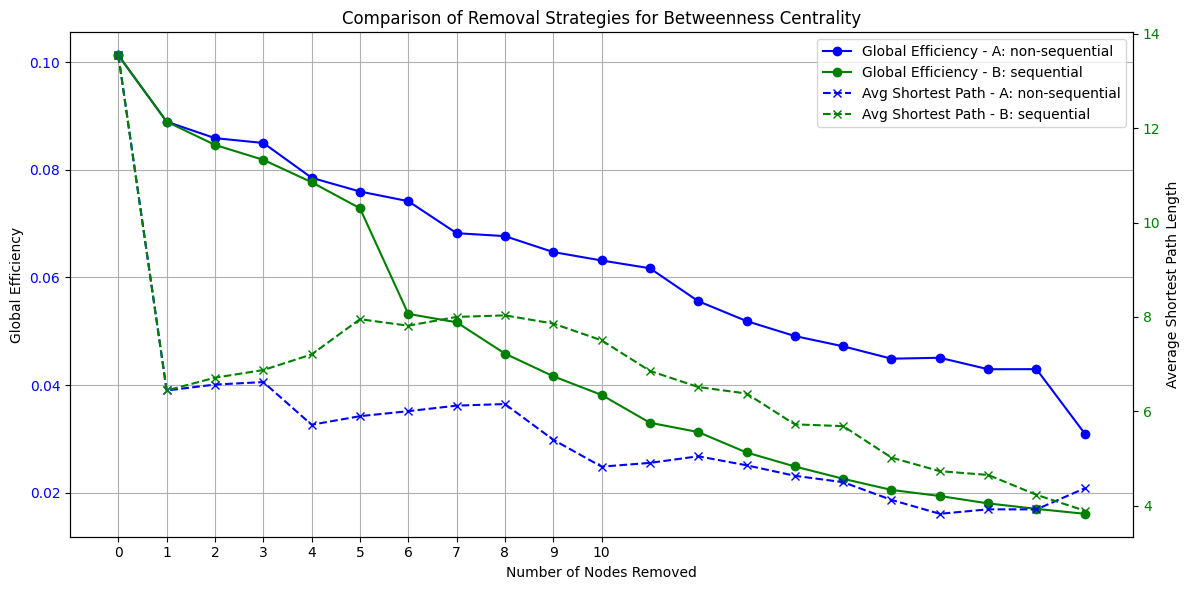

In [18]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Global Efficiency on the primary y-axis
line1, = ax1.plot(df_betweenness_A['removed node number'], df_betweenness_A['global efficiency'], label='Global Efficiency - A: non-sequential', color='blue', marker='o')
line2, = ax1.plot(df_betweenness_B['removed node number'], df_betweenness_B['global efficiency'], label='Global Efficiency - B: sequential', color='green', marker='o')
ax1.set_xlabel('Number of Nodes Removed')
ax1.set_ylabel('Global Efficiency')
ax1.tick_params(axis='y', labelcolor='blue')

# Secondary y-axis for Average Shortest Path Length
ax2 = ax1.twinx()
line3, = ax2.plot(df_betweenness_A['removed node number'], df_betweenness_A['average shortest path length'], label='Avg Shortest Path - A: non-sequential', color='blue', linestyle='--', marker='x')
line4, = ax2.plot(df_betweenness_B['removed node number'], df_betweenness_B['average shortest path length'], label='Avg Shortest Path - B: sequential', color='green', linestyle='--', marker='x')
ax2.set_ylabel('Average Shortest Path Length')
ax2.tick_params(axis='y', labelcolor='green')

# Combine legends from both y-axes
lines = [line1, line2, line3, line4]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='best')

# Set x-axis ticks to units of 1
ax1.set_xticks(np.arange(0, 11, 1))

# Title and grid
plt.title('Comparison of Removal Strategies for Betweenness Centrality')
ax1.grid(True)
ax2.grid(False)

fig.tight_layout()
plt.show()

## Eigenvector Centrality Removal

In [19]:
# A: non-sequential removal
G_E_A = G.copy()

columns = ['centrality measure', 'strategy', 'removed node number', 'removed station', 'global efficiency', 'average shortest path length']
df_eigenvector_A = pd.DataFrame(columns=columns)

g0, a0 = impact_measure(G_E_A)
df_eigenvector_A.loc[0] = ['eigenvector', 'A: non-sequential', 0, 'initial', g0, a0]
for i in range(20):
    G_E_A.remove_node(df_eigenvector_t20.index[i])
    current_g, current_a = impact_measure(G_E_A)
    df_eigenvector_A.loc[i+1] = ['eigenvector', 'A: non-sequential', i+1, df_eigenvector_t20.index[i], current_g, current_a]

df_eigenvector_A.head(11)

,centrality measure,strategy,removed node number,removed station,global efficiency,average shortest path length
0,eigenvector,A: non-sequential,0,initial,0.101256,13.545998
1,eigenvector,A: non-sequential,1,Bank and Monument,0.096735,14.130739
2,eigenvector,A: non-sequential,2,Liverpool Street,0.094668,14.516908
3,eigenvector,A: non-sequential,3,Stratford,0.084963,6.617421
4,eigenvector,A: non-sequential,4,Waterloo,0.082797,6.783249
5,eigenvector,A: non-sequential,5,Moorgate,0.082749,6.787367
6,eigenvector,A: non-sequential,6,Green Park,0.080953,6.891706
7,eigenvector,A: non-sequential,7,Oxford Circus,0.080104,6.926624
8,eigenvector,A: non-sequential,8,Tower Hill,0.079741,5.196379
9,eigenvector,A: non-sequential,9,Westminster,0.079100,5.240054


In [20]:
# B: sequential removal
G_E_B = G.copy()
#print('GEB: ', G_E_B.nodes(data=True))
df_eigenvector_B = pd.DataFrame(columns=columns)
df_eigenvector_B.loc[0] = ['eigenvector', 'B: sequential', 0, 'initial', g0, a0]

for i in range(20):
    current_e = nx.eigenvector_centrality(G_E_B, max_iter=1000)
    nx.set_node_attributes(G_E_B, current_e, 'eigenvector_t')

    df = pd.DataFrame(index=G_E_B.nodes())
    df['eigenvector_t'] = pd.Series(nx.get_node_attributes(G_E_B, 'eigenvector_t'))
    df_sorted = df.sort_values(['eigenvector_t'], ascending= False)
    
    removed_node = df_sorted.head(1)
    removed_station = removed_node.index[0]
    G_E_B.remove_node(removed_station)
    current_g, current_a = impact_measure(G_E_B)

    new_node1 = pd.DataFrame([['eigenvector', 'B: sequential', i+1, removed_station, current_g, current_a]], columns=columns)
    df_eigenvector_B = pd.concat([df_eigenvector_B,new_node1], ignore_index=True)

df_eigenvector_B.head(11)

,centrality measure,strategy,removed node number,removed station,global efficiency,average shortest path length
0,eigenvector,B: sequential,0,initial,0.101256,13.545998
1,eigenvector,B: sequential,1,Bank and Monument,0.096735,14.130739
2,eigenvector,B: sequential,2,Oxford Circus,0.095722,14.243536
3,eigenvector,B: sequential,3,Stratford,0.084813,6.608226
4,eigenvector,B: sequential,4,Earl's Court,0.083369,6.693769
5,eigenvector,B: sequential,5,Westminster,0.082412,6.758328
6,eigenvector,B: sequential,6,Baker Street,0.078219,5.278175
7,eigenvector,B: sequential,7,King's Cross St. Pancras,0.072074,4.705876
8,eigenvector,B: sequential,8,Canning Town,0.066899,4.122439
9,eigenvector,B: sequential,9,Turnham Green,0.065458,4.184255


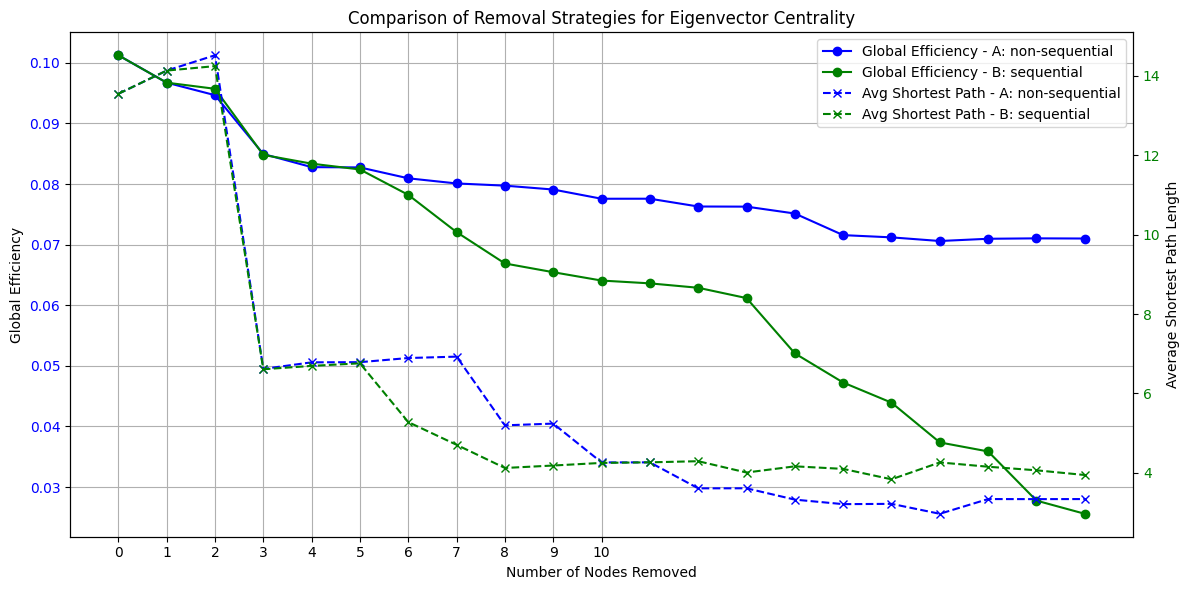

In [21]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Global Efficiency on the primary y-axis
line1, = ax1.plot(df_eigenvector_A['removed node number'], df_eigenvector_A['global efficiency'], label='Global Efficiency - A: non-sequential', color='blue', marker='o')
line2, = ax1.plot(df_eigenvector_B['removed node number'], df_eigenvector_B['global efficiency'], label='Global Efficiency - B: sequential', color='green', marker='o')
ax1.set_xlabel('Number of Nodes Removed')
ax1.set_ylabel('Global Efficiency')
ax1.tick_params(axis='y', labelcolor='blue')

# Secondary y-axis for Average Shortest Path Length
ax2 = ax1.twinx()
line3, = ax2.plot(df_eigenvector_A['removed node number'], df_eigenvector_A['average shortest path length'], label='Avg Shortest Path - A: non-sequential', color='blue', linestyle='--', marker='x')
line4, = ax2.plot(df_eigenvector_B['removed node number'], df_eigenvector_B['average shortest path length'], label='Avg Shortest Path - B: sequential', color='green', linestyle='--', marker='x')
ax2.set_ylabel('Average Shortest Path Length')
ax2.tick_params(axis='y', labelcolor='green')

# Combine legends from both y-axes
lines = [line1, line2, line3, line4]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='best')

# Set x-axis ticks to units of 1
ax1.set_xticks(np.arange(0, 11, 1))

# Title and grid
plt.title('Comparison of Removal Strategies for Eigenvector Centrality')
ax1.grid(True)
ax2.grid(False)

fig.tight_layout()
plt.show()

# Weighted network

In [22]:
# flow = pd.read_csv('london_flows.csv')
# check station names
# OD_names = set(flow.station_origin.unique())
# network_names = set([n for n in G.nodes()])
# network_names.symmetric_difference(OD_names)

In [23]:
G_W = G.copy()

# flows = {(u,v): 0 for u,v in G_W.edges()}

# #calculate shortest paths for all flows and add data to dict
# for i, row in flow.iterrows():
#     source = row.station_origin
#     target = row.station_destination
    
#     #get shortest path
#     path = nx.dijkstra_path(G_W, source, target)
    
#     #our path is a list of nodes, we need to turn this to a list of edges
#     path_edges = list(zip(path,path[1:])) 
    
#     #add flows to our dict
#     for u,v in path_edges:
#         try:
#             flows[(u,v)] += row.flows
#         except:
#             flows[(v,u)] += row.flows

In [24]:
# OD_names = set(flow.station_origin.unique())
# _filter = list(network_names.symmetric_difference(OD_names))
# _filter

In [25]:
# flow = flow[~flow.station_origin.isin(_filter)]
# flow = flow[~flow.station_destination.isin(_filter)]

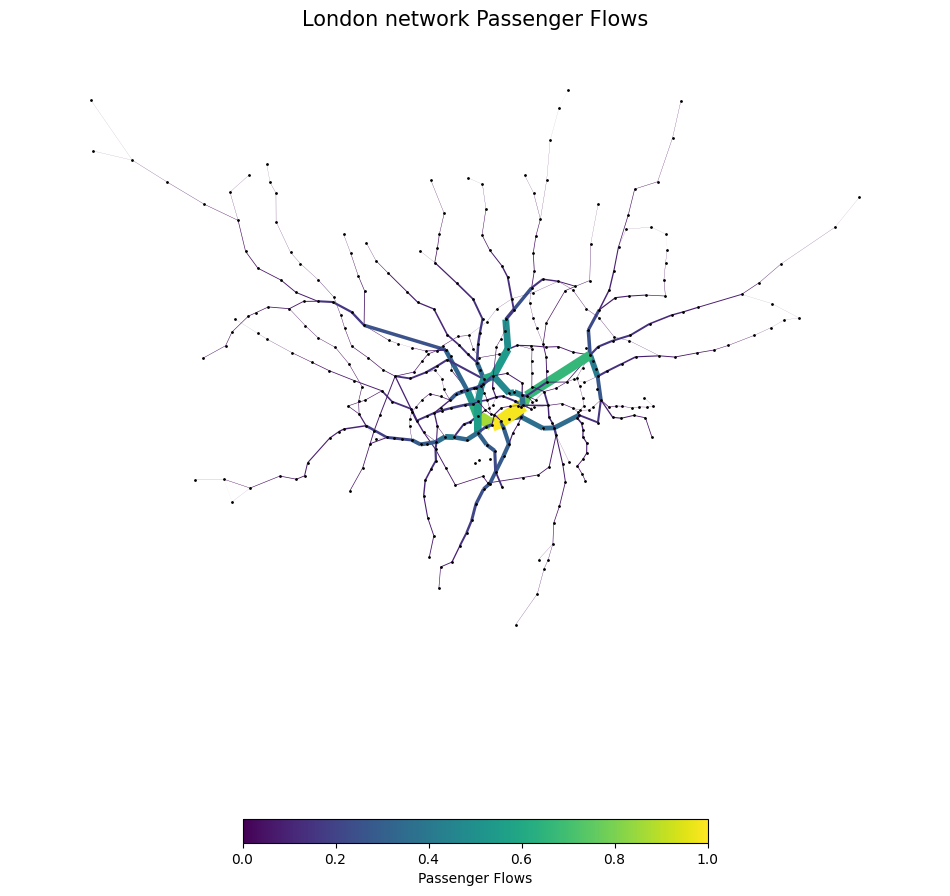

In [30]:
# nx.set_edge_attributes(G_W, flows, 'flows')
flows = nx.get_edge_attributes(G_W, 'flows')
#plot our calcuated flows
flow_values = list(flows.values())


flow_color=[(i[2]['flows']/max(flow_values)) for i in G_W.edges(data=True)]
flow_width=[(i[2]['flows']/max(flow_values)*10) for i in G_W.edges(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

#pos=nx.spring_layout(X)
edg=nx.draw_networkx_edges(G_W, pos,edge_color=flow_color, width=flow_width)

nx.draw_networkx_nodes(G_W,
        pos = pos,
        node_color= 'black',
        node_size= 1)

plt.colorbar(edg,label="Passenger Flows",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London network Passenger Flows",fontsize=15)
plt.show()

In [31]:
#get edge with highest number of flows
max(flows, key=flows.get)
#get edge data with lowest number of flows
min(flows, key=flows.get)

('Wandsworth Road', 'Battersea Park')

In [32]:
# check whether flow data is added to the edges
print(G_W.edges(data=True))

[('Wembley Park', 'Kingsbury', {'length': 2916.7715580506483, 'line_name': 'Jubilee', 'flows': 12356}), ('Wembley Park', 'Neasden', {'length': 2353.1659381957816, 'line_name': 'Jubilee', 'flows': 6744}), ('Wembley Park', 'Preston Road', {'length': 1419.7351657633037, 'line_name': 'Metropolitan', 'flows': 36601}), ('Wembley Park', 'Finchley Road', {'length': 7266.37392749648, 'line_name': 'Metropolitan', 'flows': 55216}), ('Kingsbury', 'Queensbury', {'length': 1245.9952343630068, 'line_name': 'Jubilee', 'flows': 9419}), ('Queensbury', 'Canons Park', {'length': 1693.307343195774, 'line_name': 'Jubilee', 'flows': 6385}), ('Canons Park', 'Stanmore', {'length': 1419.6694762456716, 'line_name': 'Jubilee', 'flows': 3624}), ('Stratford', 'West Ham', {'length': 1673.509515131191, 'line_name': 'Jubilee', 'flows': 91801}), ('Stratford', 'Mile End', {'length': 2805.0013918567865, 'line_name': 'Central', 'flows': 12010}), ('Stratford', 'Leyton', {'length': 2131.342925924046, 'line_name': 'Central',

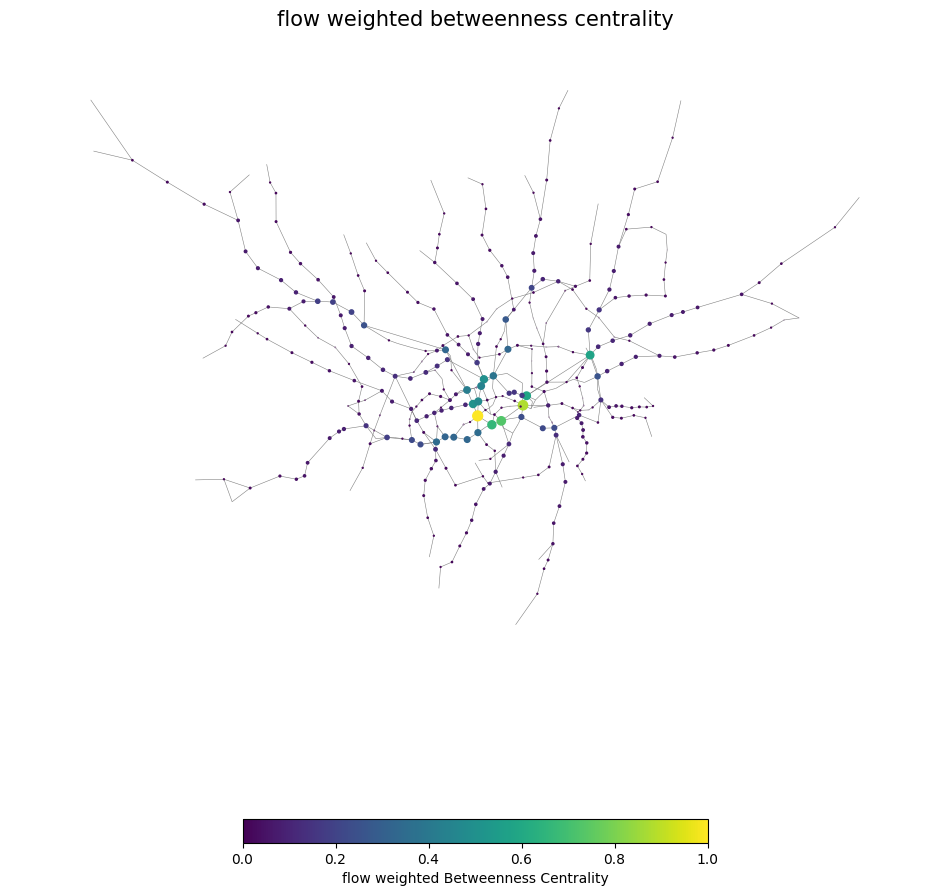

,betweenness_w
Green Park,0.572556
Bank and Monument,0.505288
Waterloo,0.416429
Westminster,0.381366
Liverpool Street,0.336817
Stratford,0.331291
Bond Street,0.291830
Euston,0.284236
Oxford Circus,0.270764
Warren Street,0.254286


In [33]:
for source, target, att in G_W.edges(data=True):
        att['flows_weight'] = 1.0 / (att.get('flows', 0) + 0.001)
        

betweenness_w = nx.betweenness_centrality(G_W, weight='flows_weight', normalized=True)
df_betweenness_w = pd.DataFrame.from_dict(betweenness_w, columns=['betweenness_w'], orient='index')
df_betweenness_w = df_betweenness_w.sort_values(by='betweenness_w', ascending=False)
df_betweenness_w20 = df_betweenness_w.head(20)

nx.set_node_attributes(G_W, betweenness_w, 'betweenness_w')

# Lets set color and width of nodes according to the closeness values
between_w_val=[(i[1]['betweenness_w']) for i in G_W.nodes(data=True)]

between_w_color=[(i[1]['betweenness_w']-min(between_w_val))/(max(between_w_val)-min(between_w_val)) for i in G_W.nodes(data=True)]
between_w_size=[((i[1]['betweenness_w']-min(between_w_val))/(max(between_w_val)-min(between_w_val))*50) for i in G_W.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G_W, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G_W,
        pos = pos,
        node_color= between_w_color,
        node_size= between_w_size)

plt.colorbar(nod,label="flow weighted Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("flow weighted betweenness centrality",fontsize=15)
plt.show()

df_betweenness_w20.head(15)

## weighted impact measure

In [34]:
def weighted_global_efficiency(G, weight):
    n = len(G)
    # total efficiency
    efficiency_sum = 0.0

    for u in G.nodes():
        for v in G.nodes():
            if u != v:
                try:
                    # calculate shortest path length using selected weight(inverted_flow in this case)
                    length = nx.shortest_path_length(G, source=u, target=v, weight=weight)
                    efficiency_sum += 1 / length
                except nx.NetworkXNoPath:
                    continue
    
    weighted_global = efficiency_sum / (n * (n - 1))
    return weighted_global

weighted_global_efficiency(G_W, 'flows_weight')

2648.721360184235

In [ ]:
def new_impact_measure(G):
    ave = nx.global_efficiency(G)
    weighted_global_eff = weighted_global_efficiency(G, 'flows_weight')
    return global_efficiency, weighted_global_eff

## 3 Node removal

In [35]:
# B: sequential removal
G_B_B3 = G_W.copy()
#print('GBB: ', G_B_B3.nodes(data=True))
df_betweenness_B3 = pd.DataFrame(columns=columns)
df_betweenness_B3.loc[0] = ['betweenness_w', 'B: sequential', 0, 'initial', g0, a0]

for i in range(3):
    current_b3 = nx.betweenness_centrality(G_B_B3, weight='flows_weight', normalized=True)
    nx.set_node_attributes(G_B_B3, current_b3, 'betweenness_w')

    df = pd.DataFrame(index=G_B_B3.nodes())
    df['betweenness_w'] = pd.Series(nx.get_node_attributes(G_B_B3, 'betweenness_w'))
    df_sorted = df.sort_values(['betweenness_w'], ascending= False)
    
    removed_node = df_sorted.head(1)
    removed_station = removed_node.index[0]
    G_B_B3.remove_node(removed_station)
    current_g, current_a = impact_measure(G_B_B3)

    new_node1 = pd.DataFrame([['betweenness_w', 'B: sequential', i+1, removed_station, current_g, current_a]], columns=columns)
    df_betweenness_B3 = pd.concat([df_betweenness_B3,new_node1], ignore_index=True)

df_betweenness_B3.head(10)

,centrality measure,strategy,removed node number,removed station,global efficiency,average shortest path length
0,betweenness_w,B: sequential,0,initial,0.101256,13.545998
1,betweenness_w,B: sequential,1,Green Park,0.099190,13.824536
2,betweenness_w,B: sequential,2,Bank and Monument,0.094872,14.382728
3,betweenness_w,B: sequential,3,King's Cross St. Pancras,0.087934,15.983773


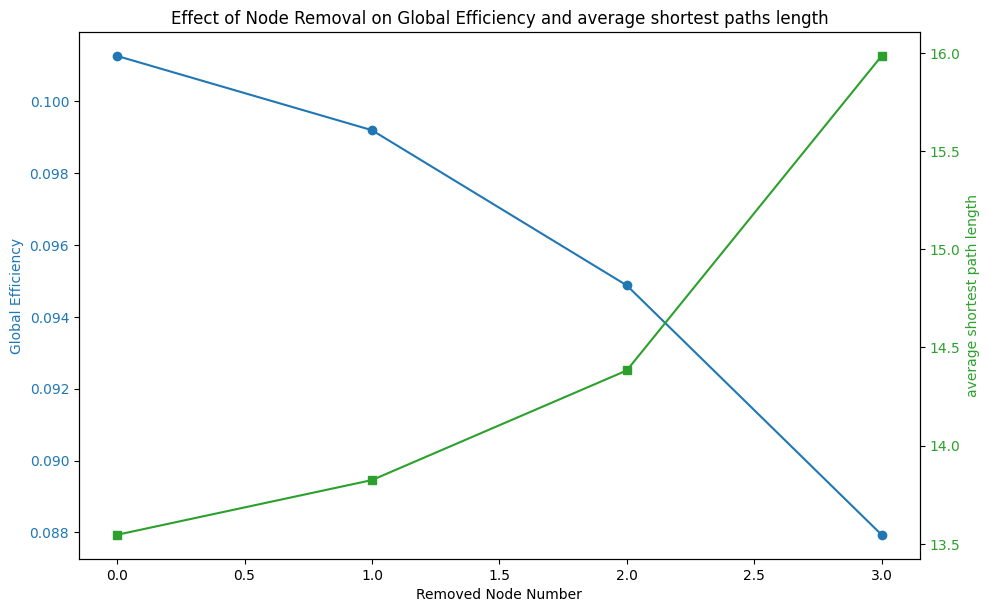

In [39]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Removed Node Number')
ax1.set_ylabel('Global Efficiency', color='tab:blue')
ax1.plot(df_betweenness_B3['removed node number'], df_betweenness_B3['global efficiency'], marker='o', color='tab:blue', label='Global Efficiency')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('average shortest path length', color='tab:green')
ax2.plot(df_betweenness_B3['removed node number'], df_betweenness_B3['average shortest path length'], marker='s', color='tab:green', label='average shortest path length')
ax2.tick_params(axis='y', labelcolor='tab:green')

fig.tight_layout()
plt.title('Effect of Node Removal on Global Efficiency and average shortest paths length')
plt.show()

In [36]:
def new_impact_measure2(G):
    global_efficiency = nx.global_efficiency(G)
    weighted_global_eff = weighted_global_efficiency(G, 'flows_weight')
    return global_efficiency, weighted_global_eff

In [37]:
# B: sequential removal
G_B_B32 = G_W.copy()
#print('GBB: ', G_B_B3.nodes(data=True))
columns = ['centrality measure', 'strategy', 'removed node number', 'removed station', 'global efficiency', 'weighted global efficiency']
df_betweenness_B32 = pd.DataFrame(columns=columns)
a0 = weighted_global_efficiency(G_B_B32, 'flows_weight')
df_betweenness_B32.loc[0] = ['betweenness_w', 'B: sequential', 0, 'initial', g0, a0]

for i in range(3):
    current_b32 = nx.betweenness_centrality(G_B_B32, weight='flows_weight', normalized=True)
    nx.set_node_attributes(G_B_B32, current_b32, 'betweenness_w')

    df = pd.DataFrame(index=G_B_B32.nodes())
    df['betweenness_w'] = pd.Series(nx.get_node_attributes(G_B_B32, 'betweenness_w'))
    df_sorted = df.sort_values(['betweenness_w'], ascending= False)
    
    removed_node = df_sorted.head(1)
    removed_station = removed_node.index[0]
    G_B_B32.remove_node(removed_station)
    current_g, current_a = new_impact_measure2(G_B_B32)

    new_node1 = pd.DataFrame([['betweenness_w', 'B: sequential', i+1, removed_station, current_g, current_a]], columns=columns)
    df_betweenness_B32 = pd.concat([df_betweenness_B32,new_node1], ignore_index=True)

df_betweenness_B32.head(10)

,centrality measure,strategy,removed node number,removed station,global efficiency,weighted global efficiency
0,betweenness_w,B: sequential,0,initial,0.101256,2648.721360
1,betweenness_w,B: sequential,1,Green Park,0.099190,2387.102515
2,betweenness_w,B: sequential,2,Bank and Monument,0.094872,2062.541162
3,betweenness_w,B: sequential,3,King's Cross St. Pancras,0.087934,1699.797833


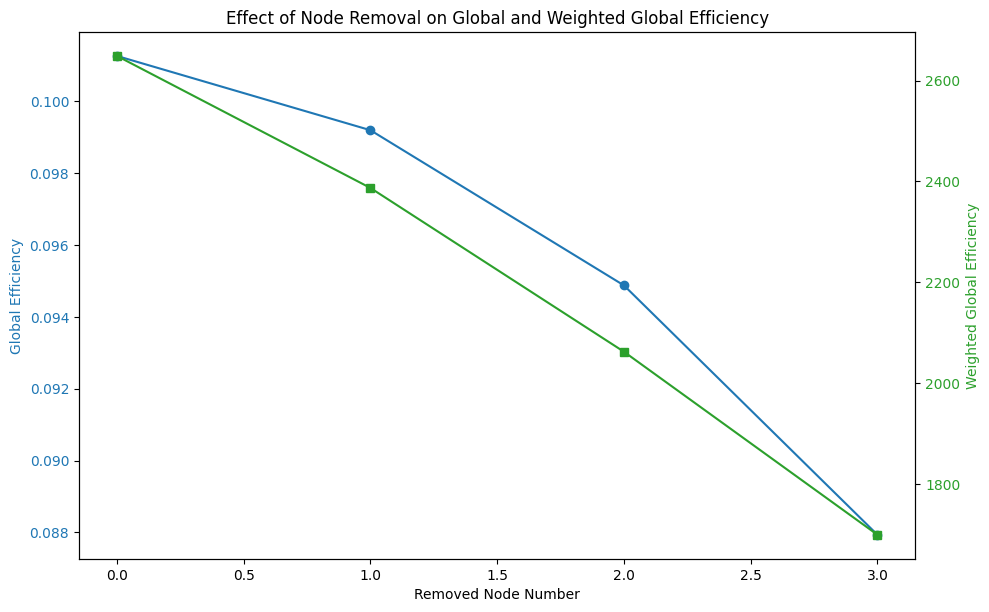

In [38]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Removed Node Number')
ax1.set_ylabel('Global Efficiency', color='tab:blue')
ax1.plot(df_betweenness_B32['removed node number'], df_betweenness_B32['global efficiency'], marker='o', color='tab:blue', label='Global Efficiency')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Weighted Global Efficiency', color='tab:green')
ax2.plot(df_betweenness_B32['removed node number'], df_betweenness_B32['weighted global efficiency'], marker='s', color='tab:green', label='Weighted Global Efficiency')
ax2.tick_params(axis='y', labelcolor='tab:green')

fig.tight_layout()
plt.title('Effect of Node Removal on Global and Weighted Global Efficiency')
plt.show()